In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## **Customer Segmentation Analysis**

In [ ]:
df = pd.read_csv('/content/ifood_df.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
print(df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [ ]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = pd.get_dummies(df, drop_first=True)

## ** Descriptive Statistics**

In [ ]:
# Average total amount spent by customers
average_spent = df['MntTotal'].mean()
print("Average Total Spend:", average_spent)

Average Total Spend: 563.789213260762


In [ ]:
# Frequency of purchases
purchase_frequency = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['PurchaseFrequency'] = purchase_frequency
print(df[['PurchaseFrequency']].describe())

       PurchaseFrequency
count        2021.000000
mean           14.897575
std             7.598261
min             0.000000
25%             8.000000
50%            15.000000
75%            21.000000
max            43.000000


# **Customer Segmentation Using K-Means Clustering**

In [ ]:
features = ['Income', 'Recency', 'MntTotal', 'PurchaseFrequency', 'NumWebVisitsMonth']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Show cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.82768277 -0.84883547 -0.79663712 -0.81894207  0.55006203]
 [ 1.22366209  0.06172644  1.25098231  0.68028855 -1.21891803]
 [-0.72399279  0.91249101 -0.78078722 -0.78263517  0.36433774]
 [ 0.43065699 -0.06844159  0.42766094  1.02596639  0.24071624]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


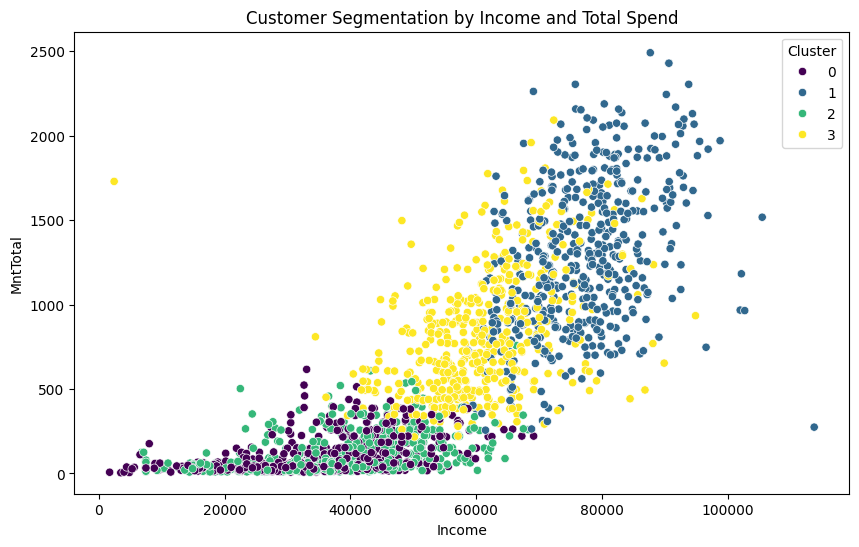

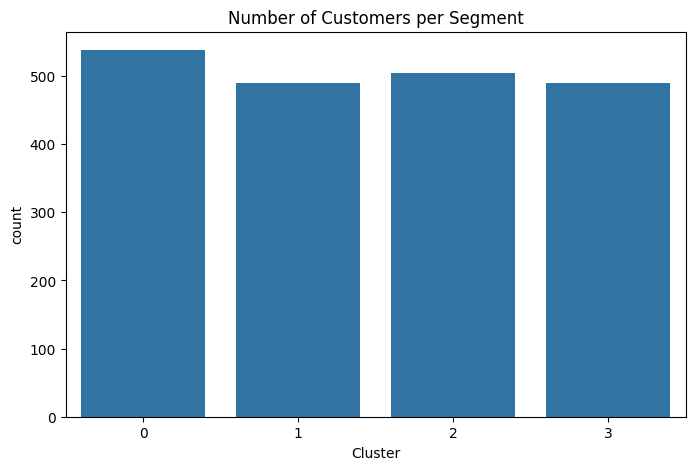

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation by Income and Total Spend')
plt.show()

# Bar plot for the number of customers in each segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df)
plt.title('Number of Customers per Segment')
plt.show()

In [ ]:
cluster_analysis = df.groupby('Cluster')[['Income', 'Recency', 'MntTotal', 'PurchaseFrequency']].mean()
print(cluster_analysis)

               Income    Recency     MntTotal  PurchaseFrequency
Cluster                                                         
0        34547.669145  24.312268   104.421933           8.676580
1        77026.757143  50.667347  1285.146939          20.065306
2        36694.873016  75.291667   113.561508           8.952381
3        60605.269939  46.899796   810.392638          22.691207


In [ ]:
# Basic CLV estimation based on total amount spent and frequency of purchases
df['CLV'] = df['MntTotal'] * df['PurchaseFrequency'] / df['Customer_Days']
print(df[['CLV']].describe())

               CLV
count  2021.000000
mean      4.591329
std       5.231836
min       0.000000
25%       0.175610
50%       2.139773
75%       8.123671
max      28.941907


In [ ]:
# Create RFM segmentation
df['R_Score'] = pd.qcut(df['Recency'], 4, labels=[1, 2, 3, 4])  # Lower Recency is better
df['F_Score'] = pd.qcut(df['PurchaseFrequency'], 4, labels=[4, 3, 2, 1])  # Higher Frequency is better
df['M_Score'] = pd.qcut(df['MntTotal'], 4, labels=[4, 3, 2, 1])  # Higher Monetary value is better
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
print(df[['RFM_Score']].describe())

       RFM_Score
count       2021
unique        48
top          244
freq         122


In [ ]:
# Identify preferred product category for each customer
df['PreferredCategory'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].idxmax(axis=1)
preferred_category_counts = df['PreferredCategory'].value_counts()
print(preferred_category_counts)


PreferredCategory
MntWines            1388
MntMeatProducts      399
MntGoldProds         154
MntFishProducts       53
MntSweetProducts      15
MntFruits             12
Name: count, dtype: int64


In [ ]:
# Calculate the preferred purchasing channel for each customer
df['PreferredChannel'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)
channel_counts = df['PreferredChannel'].value_counts()
print(channel_counts)


PreferredChannel
NumStorePurchases      1214
NumWebPurchases         422
NumDealsPurchases       251
NumCatalogPurchases     134
Name: count, dtype: int64


In [ ]:
# Flagging potential churn risks based on high Recency and Complaint status
df['ChurnRisk'] = np.where((df['Recency'] > df['Recency'].quantile(0.75)) & (df['Complain'] == 1), 1, 0)
churn_risk_customers = df[df['ChurnRisk'] == 1]
print(f"Number of potential churn risks: {len(churn_risk_customers)}")


Number of potential churn risks: 4


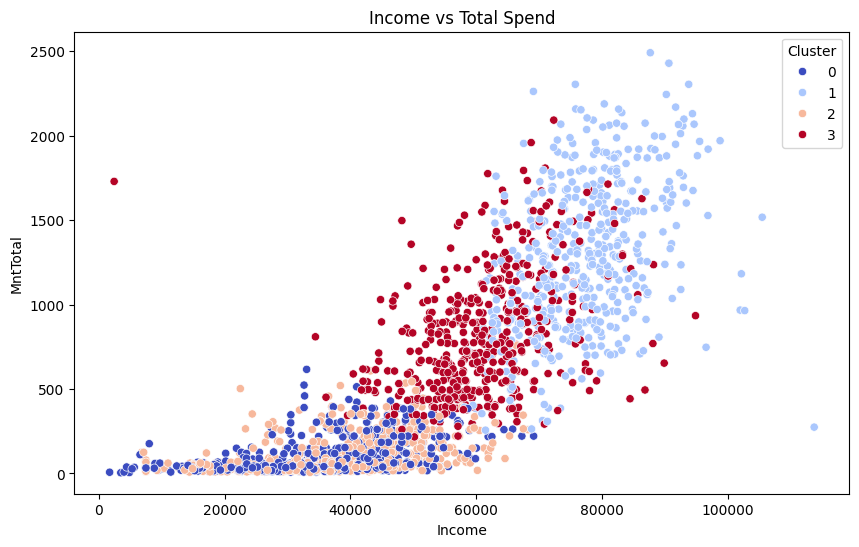

In [ ]:
# Income vs Total Spending scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'], palette='coolwarm')
plt.title('Income vs Total Spend')
plt.show()


In [ ]:
# Analyzing customers who accepted any campaigns
campaign_acceptance = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
print("Total campaign acceptances:\n", campaign_acceptance)

# Customers who accepted more than 3 campaigns
highly_engaged = df[df['AcceptedCmpOverall'] > 3]
print(f"Number of highly engaged customers: {len(highly_engaged)}")


Total campaign acceptances:
 AcceptedCmp1    133
AcceptedCmp2     26
AcceptedCmp3    151
AcceptedCmp4    155
AcceptedCmp5    146
dtype: int64
Number of highly engaged customers: 10


In [ ]:
# Calculate family size and analyze spending
df['FamilySize'] = df['Kidhome'] + df['Teenhome']
family_spend_analysis = df.groupby('FamilySize')['MntTotal'].mean()
print(family_spend_analysis)


FamilySize
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: MntTotal, dtype: float64


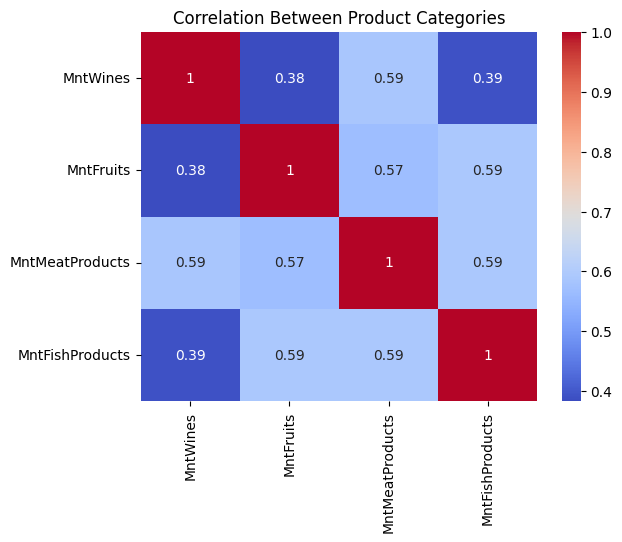

In [ ]:
# Correlation between different product categories for bundling insights
correlations = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Product Categories')
plt.show()


# **Insights and Recommendations**

 The average total amount spent by customers is 563.79


*    **Mean:** The average purchase frequency is 14.90. This suggests that customers make an average of 15 purchases per year.
* **Standard Deviation:** The standard deviation of 7.60 indicates a relatively high degree of variability in purchase frequency. Some customers may make significantly more or fewer purchases than the average.

*   **Minimum and Maximum**: The minimum purchase frequency is 0, meaning some customers have not made any purchases. The maximum value is not provided, but it can be inferred that there are some customers

**Cluster Centers:**


*   **Cluster 0**: Characterized by low income, low recency, low total spending, low purchase frequency, and high web visits. This cluster might represent potential customers or customers who are not actively engaged.Has the largest number of customers, indicating that it is the most common segment.
  
* **Cluster 1:** High income, moderate recency, high total spending, high purchase frequency, and low web visits. This cluster could represent high-value customers who prefer traditional shopping methods.Has the smallest number of customers, suggesting that it is the least common segment.
*  **Cluster 2:** Low income, high recency, low total spending, low purchase frequency, and moderate web visits. This cluster might represent customers who are recently active but not spending much.Have a moderate number of customers, falling between Cluster 0 and Cluster 1.

*  **Cluster 3:** Moderate income, moderate recency, moderate total spending, high purchase frequency, and moderate web visits. This cluster could represent a general group of customers with average spending habits.Have a moderate number of customers, falling between Cluster 0 and Cluster 1.


**Customer Lifetime Value (CLV)**
CLV distribution shows an average CLV of ~4.6, with a maximum of ~28.9 and a minimum of 0. Customers with higher CLV values should be prioritized for retention and special attention.

**Campaign Acceptance**
The highest number of customers accepted campaigns 4 and 5, indicating these campaigns were the most successful. Campaign 2 had very low acceptance (~26).

**Recency & Retention Insights**
Cluster 3 and Cluster 1 have the best recency (lowest values), meaning these customers are more engaged. On the other hand, Cluster 2 has a recency of ~75, which could indicate a need for re-engagement.

* Wine and Fish: There is a strong positive correlation between wine and fish products, suggesting that they might be complementary products.
* Fruit and Meat: There is a moderate positive correlation between fruit and meat products, indicating that they could also be considered complementary items.
* Wine and Fruit: There is a strong negative correlation between wine and fruit, suggesting that these products might be substitutes.

**Recommendations:**

**Customer Segmentation**
Identify high-value customers: Focus on customers in Cluster 1, as they have the potential to generate significant revenue.

Target potential customers: Invest in strategies to convert customers in Cluster 0 into active customers.

Analyze customer behavior: Understand the factors driving CLV variations to develop more effective customer retention and acquisition strategies.

**Product Bundling**
Leverage complementary products: Explore bundling opportunities for wine and fish, as well as fruit and meat.

Create attractive offers: Develop special packages or discounts to incentivize customers to purchase bundled products.

**Marketing Strategies**
Tailor marketing efforts: Develop targeted marketing campaigns based on customer segments. For example, offer premium products and services to Cluster 1 customers and provide promotional offers to Cluster 0 customers.

Personalize recommendations: Use customer data to recommend products that are likely to be of interest to individual customers.

Optimize product offerings: Continuously analyze customer preferences and adjust product offerings to meet changing needs.

**Customer Retention**
Prioritize customer satisfaction: Focus on providing excellent customer service and addressing customer needs promptly.

Offer loyalty programs: Implement loyalty programs to reward repeat customers and encourage repeat purchases.

Personalize communication: Engage with customers on a personal level through targeted communication channels.